<a href="https://colab.research.google.com/github/Benned-H/Summer2019/blob/master/PythonProjects/Coding_Dilation_Erosion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

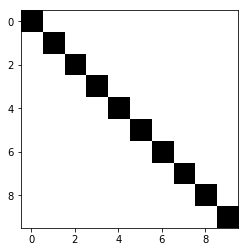

In [118]:
#  Let's say our image is the following 10x10 pattern:
import numpy as np
from matplotlib import pyplot as plt

image = np.array([
    [1,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,1]
               ])
plt.imshow(image, cmap = 'Greys')
plt.show()

In [0]:
def plotKernel(kernel):  
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  x_ticks = [x + 0.5 for x in range(kernel.shape[1])]
  y_ticks = [y + 0.5 for y in range(kernel.shape[1])]
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_xticks(x_ticks, minor=True)
  ax.set_yticks(y_ticks, minor=True)
  ax.grid(b=True, which='minor', color='b', linestyle='-')
  ax.imshow(kernel, cmap = 'Greys')
  
  plt.show()

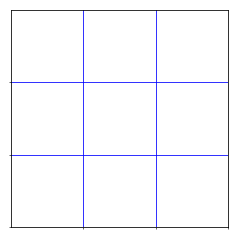

In [120]:
# Our kernels:
kernel_1x1 = np.array([[1]])
kernel_3x3 = np.array([[1,1,1],[1,1,1],[1,1,1]])
kernel_5x3 = np.array([[0,1,0],[1,1,1],[1,1,1],[1,1,1],[0,0,0]])

plotKernel(kernel_3x3)

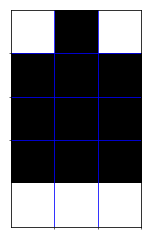

In [121]:
plotKernel(kernel_5x3)

In [0]:
def splitKernel(kernel):
  """Splits given kernel into individual offsets from its center.
  Also gives maximum offsets in order left right up down."""
    
  if not isinstance(kernel, np.ndarray):
    print("Error: Invalid kernel. Need numpy array")
    return None
  
  # Require 2D array.
  if len(kernel.shape) != 2:
    print("Error: Invalid kernel. Need 2D array")
    return None
  
  height = kernel.shape[0]
  width = kernel.shape[1]
  
  # Require odd dimensions on kernel. Input pixel at center.
  if (height % 2 != 1) or (width % 2 != 1):
    print("Error: Invalid kernel. Need odd dimensions")
    return None
  
  center_r = int(height) // 2
  center_c = int(width) // 2
  outputs = []
  
  # Loop over all pixels
  for r in range(height):
    for c in range(width):
      if kernel[r][c] == 1:
        outputs.append((r - center_r, c - center_c))
        
  return outputs

In [123]:
print(splitKernel(kernel_1x1))
print(splitKernel(kernel_3x3))
print(splitKernel(kernel_5x3))

[(0, 0)]
[(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)]
[(-2, 0), (-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)]


In [0]:
def maxOffsets(offsets):
  # Do this to avoid if statements on all input pixels.
  left = 0
  right = 0
  up = 0
  down = 0
  
  # Find max offset in each direction.
  for o in offsets:
    left = max(left, -o[1])
    right = max(right, o[1])
    up = max(up, -o[0])
    down = max(down, o[0])
    
  return left,right,up,down

In [0]:
kernel_7x5 = np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,1],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,1,0,0]])

In [126]:
# It seems to work! L R U D
maxOffsets(splitKernel(kernel_7x5))

(0, 2, 1, 3)

In [0]:
def dilate(image, kernel):
  """Dilate the given image using the given kernel.
  Note: Only uses binary images/kernel."""
  
  # Split the kernel into individual offset coordinates.
  kernel_parts = splitKernel(kernel)
  
  # Fetch the maximum offsets from any input pixel in our kernel.
  left,right,up,down = maxOffsets(kernel_parts)
  
  output = np.zeros(image.shape)
  
  # Main part of image checking, no if statements needed:
  for r in range(0 + up, image.shape[0] - down):
    for c in range(0 + left, image.shape[1] - right):
      for k in kernel_parts:
        curr_r = r + k[0]
        curr_c = c + k[1]
        if image[curr_r][curr_c] == 1:
          output[r][c] = 1
          
  # Now cover four sides and corners:
  
  # Left side:
  for r in range(0 + up, image.shape[0] - down):
    for c in range(0, left):
      for k in kernel_parts:
        curr_r = r + k[0]
        curr_c = c + k[1]
        if curr_c >= 0:
          if image[curr_r][curr_c] == 1:
            output[r][c] = 1
            
  # Right side:
  for r in range(0 + up, image.shape[0] - down):
    for c in range(image.shape[1] - right, image.shape[1]):
      for k in kernel_parts:
        curr_r = r + k[0]
        curr_c = c + k[1]
        if curr_c < image.shape[1]:
          if image[curr_r][curr_c] == 1:
            output[r][c] = 1
  
  # Top side:
  for r in range(0, up):
    for c in range(0 + left, image.shape[1] - right):
      for k in kernel_parts:
        curr_r = r + k[0]
        curr_c = c + k[1]
        if curr_r >= 0:
          if image[curr_r][curr_c] == 1:
            output[r][c] = 1
            
  # Bottom side:
  for r in range(image.shape[0] - down, image.shape[0]):
    for c in range(0 + left, image.shape[1] - right):
      for k in kernel_parts:
        curr_r = r + k[0]
        curr_c = c + k[1]
        if curr_r < image.shape[0]:
          if image[curr_r][curr_c] == 1:
            output[r][c] = 1
  
  # Left top corner:
  for r in range(0, up):
    for c in range(0, left):
      for k in kernel_parts:
        curr_r = r + k[0]
        curr_c = c + k[1]
        if curr_r >= 0 and curr_c >= 0:
          if image[curr_r][curr_c] == 1:
            output[r][c] = 1
          
  # Right top corner:
  for r in range(0, up):
    for c in range(image.shape[1] - right, image.shape[1]):
      for k in kernel_parts:
        curr_r = r + k[0]
        curr_c = c + k[1]
        if curr_r >= 0 and curr_c < image.shape[1]:
          if image[curr_r][curr_c] == 1:
            output[r][c] = 1
            
  # Left bottom corner:
  for r in range(image.shape[0] - down, image.shape[0]):
    for c in range(0, left):
      for k in kernel_parts:
        curr_r = r + k[0]
        curr_c = c + k[1]
        if curr_r < image.shape[0] and curr_c >= 0:
          if image[curr_r][curr_c] == 1:
            output[r][c] = 1
            
  # Right bottom corner:
  for r in range(image.shape[0] - down, image.shape[0]):
    for c in range(image.shape[1] - right, image.shape[1]):
      for k in kernel_parts:
        curr_r = r + k[0]
        curr_c = c + k[1]
        if curr_r < image.shape[0] and curr_c < image.shape[1]:
          if image[curr_r][curr_c] == 1:
            output[r][c] = 1
            
  return output

In [128]:
dilate(image,kernel_1x1)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

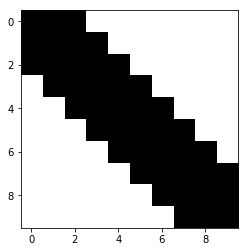

In [129]:
plt.imshow(dilate(image,kernel_3x3), cmap = 'Greys')

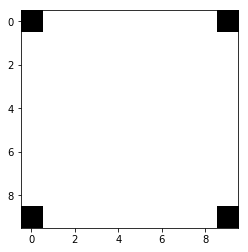

In [130]:
image2 = np.array([
    [1,0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,1]
               ])
plt.imshow(image2, cmap = 'Greys')

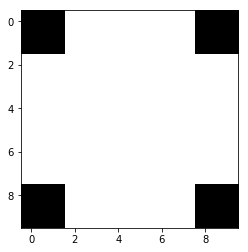

In [131]:
plt.imshow(dilate(image2,kernel_3x3), cmap = 'Greys')

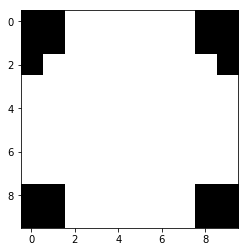

In [132]:
plt.imshow(dilate(image2,kernel_5x3), cmap = 'Greys')

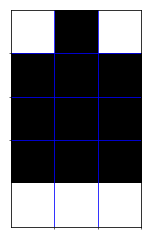

In [133]:
plotKernel(kernel_5x3)

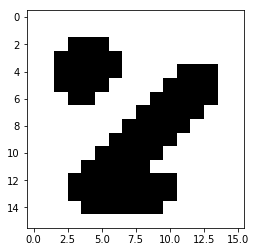

In [134]:
image3 = np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,1,1,1,0,0,0,0,1,1,1,0,0],
    [0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0],
    [0,0,0,1,1,0,0,0,0,1,1,1,1,1,0,0],
    [0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0],
    [0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0],
    [0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0],
    [0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0],
    [0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0],
    [0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               ])
plt.imshow(image3, cmap = 'Greys')

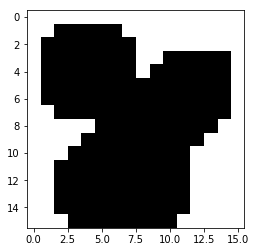

In [135]:
# This was the example given and my code matches it.
plt.imshow(dilate(image3,kernel_3x3), cmap = 'Greys')